# Проект спринта "Мастерская_1"

# Тема "Предсказание стоимости автомобиля на вторичном рынке"

# Описание проекта

Многие знают про маркетплейсы где продаются б/у вещи и на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становится особо актуальным, если речь идет про дорогие товары, например про автомобили!
***
Предлагаем принять участие в Мастерской, в рамках которой вы сможете поработать с данными о продажах автомобилей на вторичном рынке. Целью проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

# Цели и задачи проекта

**Цели проекта:**<br>
разработать модель предсказания стоимости автомобиля на вторичном рынке.<br><br>
**Задачи проекта:**<br>
- загрузка и ознакомление с данными;
- предварительная обработка;
- полноценный разведочный анализ;
- разработка новых синтетических признаков;
- проверка на мультиколлинеарность;
- отбор финального набора обучающих признаков;
- выбор и обучение моделей;
- итоговая оценка качества предсказания лучшей модели;
- анализ важности ее признаков.

# Содержание проекта

**1. Загрузка файлов с данными и изучение общей информации**<br>
<a id='загрузка_файла'></a>
[Шаг 1.1. Загрузка файлов](#загрузка_файла_задание)<br>
<a id='изучение_данных'></a>
[Шаг 1.2. Изучение данных](#изучение_данных_задание)<br>
<a id='предобработка_данных'></a>
[Шаг 1.3. Предобработка данных](#предобработка_данных_задание)<br>
<a id='категориальные_значения'></a>
[Шаг 1.4. Изучение категориальных значений](#категориальные_значения_задание)<br>
<a id='количественные_значения'></a>
[Шаг 1.5. Проверка количественных значений](#количественные_значения_задание)<br>

**2. Разработка модели машинного обучения**<br>
<a id='ohe_данных'></a>
[Шаг 2.1. One-hot кодирование](#ohe_данных_задание)<br>
<a id='выделение_признаков'></a>
[Шаг 2.2. Выделение признаков](#выделение_признаков_задание)<br>
<a id='масштабирование'></a>
[Шаг 2.3. Масштабирование признаков](#масштабирование_задание)<br>
<a id='построение_модели'></a>
[Шаг 2.4. Построение моделей](#построение_модели_задание)<br>

**3. Проверка модели**<br>
<a id='проверка_модели'></a>
[Шаг 3.1. Проверка модели](#проверка_модели_задание)<br>
<a id='константная_модель'></a>
[Шаг 3.2. Сравнение с константной моделью](#константная_модель_задание)<br>

**4. Значимые признаки выбранной модели**<br>
<a id='признаки'></a>
[Шаг 4. Значимые признаки выбранной модели](#признаки_задание)<br>

**5. Общий вывод по проекту**<br>
<a id='общий_вывод'></a>
[Шаг 5. Общий вывод](#общий_вывод_задание)

# 1. Загрузка файлов с данными и изучение общей информации

## Импорт библиотек и загрузка файлов с данными
<a id='загрузка_файла_задание'></a>
[К содержанию](#загрузка_файла)

**1.1.** Импорт библиотек.

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
import scipy
import tqdm
import time

from scipy import stats as st
from matplotlib import pyplot as plt

from tqdm import tqdm

from sklearn import tree, metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from catboost import CatBoostRegressor

from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder
)

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_squared_error,
    mean_squared_log_error
)

In [6]:
#pip install -U scikit-learn --user

**1.2.** Объявление глобальных переменных.

In [7]:
RANDOM_STATE=12345

**1.3.** Загрузка файлов с данными.

In [8]:
try:
    df_train = pd.read_csv('G:\\Yandex\\used_cars\\train.csv')
except Exception as e:
    df_train = pd.read_csv('https://www.kaggle.com/competitions/used-cars-price-prediction/data?select=test.csv')
    print('Файл успешно загружен!')
except FileNotFoundError:
    print('Файл загрузить не удалось! Проверьте его месторасположение.')
else:
    print('Файл успешно загружен!')

Файл успешно загружен!


In [9]:
try:
    df_test = pd.read_csv('G:\\Yandex\\used_cars\\test.csv')
except Exception as e:
    df_test = pd.read_csv('https://www.kaggle.com/competitions/used-cars-price-prediction/data?select=train.csv')
    print('Файл успешно загружен!')
except FileNotFoundError:
    print('Файл загрузить не удалось! Проверьте его месторасположение.')
else:
    print('Файл успешно загружен!')

Файл успешно загружен!


In [10]:
try:
    df_test_target = pd.read_csv('G:\\Yandex\\used_cars\\sample_submission.csv')
except Exception as e:
    df_test_target = pd.read_csv('https://www.kaggle.com/competitions/used-cars-price-prediction/data?select=sample_submission.csv')
    print('Файл успешно загружен!')
except FileNotFoundError:
    print('Файл загрузить не удалось! Проверьте его месторасположение.')
else:
    print('Файл успешно загружен!')

Файл успешно загружен!


In [11]:
print(df_test.shape)
print(df_test_target.shape)

(110060, 14)
(110060, 2)


In [12]:
df_test = df_test.merge(df_test_target, left_on='vin', right_on='vin', how='inner')

In [13]:
print(df_test.shape)

(110060, 15)


## Изучение данных
<a id='изучение_данных_задание'></a>
[К содержанию](#изучение_данных)

**2.1.** Сброс ограничений на количество выводимых полей таблицы.

In [14]:
pd.set_option('display.max_columns', None)

**2.2.** Установка единообразного отображения вещественных чисел с двумя знаками после запятой.

In [15]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**2.3.** Изучение общей информации о датасетах, структуре данных.

In [16]:
data_label = ['df_train', 'df_test']

In [17]:
def df_info(data, data_label):
    
    print('Вывод первых пяти строк датасета {}:'.format(data_label))
    display(data.head())
    print()
    
    print('Вывод пяти случайных строк датасета {}:'.format(data_label))
    display(data.sample(5))
    print()
    
    print('Изучение общей информации о датасете {}, структуре данных:'.format(data_label), '\n')
    print(data.info())

In [18]:
df_info(df_train, data_label[0])

Вывод первых пяти строк датасета df_train:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.20,"111,041.00",black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.50,"31,034.00",black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.20,"35,619.00",black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.80,"131,301.00",gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.00,"127,709.00",black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)



Вывод пяти случайных строк датасета df_train:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
287355,2010,Ford,Mustang,V6,Coupe,automatic,1zvbp8an8a5125679,nv,3.80,"78,376.00",white,black,gaudin motor co,10000,Thu Dec 18 2014 11:45:00 GMT-0800 (PST)
224353,2008,Ford,F-150,STX,SuperCab,automatic,1ftrx12w08fb48619,fl,1.90,"102,255.00",gray,—,regional acceptance corporation / greenville,8300,Thu Feb 05 2015 01:35:00 GMT-0800 (PST)
15043,2009,Volkswagen,Jetta,TDI,Sedan,manual,3vwal71k49m151564,ca,3.00,"95,339.00",silver,gray,tradewinds remarketing,9300,Wed Mar 04 2015 04:30:00 GMT-0800 (PST)
72627,2008,BMW,3 Series,328i,coupe,NaN,wbawb33548p134457,pa,4.00,"52,341.00",silver,black,r hollenshead auto sales inc,14900,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT)
403682,2012,Ford,Fusion,SEL,Sedan,NaN,3fahp0ja6cr332881,pa,2.60,"54,307.00",silver,black,the hertz corporation,10400,Fri Feb 13 2015 01:00:00 GMT-0800 (PST)



Изучение общей информации о датасете df_train, структуре данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB
None


In [19]:
df_info(df_test, data_label[1])

Вывод первых пяти строк датасета df_test:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,sellingprice
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.70,"116,970.00",silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),"4,359.65"
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.40,"6,286.00",white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),"20,820.81"
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.60,"11,831.00",gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST),"19,730.90"
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.30,"57,105.00",silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST),"10,417.51"
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.90,"31,083.00",black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT),"26,142.94"



Вывод пяти случайных строк датасета df_test:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,sellingprice
74399,2014,Honda,Odyssey,EX-L,Minivan,automatic,5fnrl5h66eb058904,ga,4.80,"12,113.00",black,gray,"ahfc/honda lease trust/hvt, inc.",Thu May 21 2015 03:00:00 GMT-0700 (PDT),"19,167.96"
56044,2010,Toyota,Corolla,LE,sedan,automatic,2t1bu4ee8ac253759,nc,2.70,"72,767.00",red,gray,hendrick toyota scion wilmington,Fri May 29 2015 02:30:00 GMT-0700 (PDT),"9,641.25"
6740,2011,Honda,CR-V,EX-L,SUV,NaN,5j6re4h77bl124554,pa,2.70,"34,551.00",green,beige,"ahfc/honda lease trust/hvt, inc. eot",Fri Jan 09 2015 09:00:00 GMT-0800 (PST),"18,936.01"
2025,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d83dgb16512,ca,3.40,"46,342.00",black,black,ge fleet services for itself/servicer,Tue May 19 2015 05:00:00 GMT-0700 (PDT),"18,549.12"
72764,2013,Lincoln,MKX,Base,SUV,automatic,2lmdj6jkxdbl23011,tn,4.90,"12,712.00",—,black,"ford motor credit company,llc",Thu Feb 05 2015 03:00:00 GMT-0800 (PST),"26,455.54"



Изучение общей информации о датасете df_test, структуре данных: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110060 entries, 0 to 110059
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110060 non-null  int64  
 1   make          107999 non-null  object 
 2   model         107981 non-null  object 
 3   trim          107946 non-null  object 
 4   body          107466 non-null  object 
 5   transmission  97048 non-null   object 
 6   vin           110060 non-null  object 
 7   state         110060 non-null  object 
 8   condition     107681 non-null  float64
 9   odometer      110041 non-null  float64
 10  color         109902 non-null  object 
 11  interior      109902 non-null  object 
 12  seller        110060 non-null  object 
 13  saledate      110060 non-null  object 
 14  sellingprice  110060 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 13.4+ MB
None


> **Вывод к шагу 1.2 "Изучение данных"**

Согласно документации к данным.<br><br>
В таблицах **train** и **test** содержатся одинаковые столбцы.<br><br>
**Признаки:**<br>
- **year** - *год производства*
- **make** - *производитель*
- **model** - *модель*
- **trim** - *модификация*
- **body** - *тип кузова*
- **transmission** - *тип КПП*
- **vin** - *идентификатор (вин)*
- **state** - *штат регистрации*
- **condition** - *состояние по шкале (1-5)*
- **odometer** - *пробег в милях*
- **color** - *цвет кузова*
- **interior** - *цвет интерьера*
- **seller** - *продавец*
- **saledate** - *дата продажи*


**Целевой признак:**<br>
- **sellingprice** — *стоимость продажи*

Для датасетов **df_train** и **df_test**.

- В датасетах train - **440236 записей, 15 полей**, test - **110060 записей, 15 полей**.
- Нарушения стиля в заголовках полей отсутствуют.
- В полях 'make', 'model', 'trim', 'body', 'transmission', 'condition', 'odometer', 'color', 'interior' **присутствуют пропущенные значения**.
- Для поля **'odometer'** видится возможным **изменение типа данных** на int64 для снижения нагрузки и удобства визуализации данных (отсутствия дробных частей в лейблах/подписях).
- Поле **'saledate'** следует привести к типу datetime. 
- Для удобства работы с данными видится возможным **изменение регистра** полей типа object (приведение к единому регистру).
- В полях таблицы **возможны дубликаты**. Следует рассмотреть уникальные значения.
- Поля **'vin', 'seller'** не внесут смыслового вклада в модель, их предполагается удалить.

## Предобработка данных
<a id='предобработка_данных_задание'></a>
[К содержанию](#предобработка_данных)

**3.1.** Предобработка данных таблицы.

**a)** Изменение типа данных float64 на тип данных **int64** (значения в поле **'odometer'**).

In [20]:
df_train['odometer'].sort_values().unique()

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 9.80113e+05,
       9.99999e+05,         nan])

In [21]:
df_test['odometer'].sort_values().unique()

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 6.21388e+05,
       9.99999e+05,         nan])

Автомобили с нулевым пробегом отсутствуют. С целью дальнейшего преобразования типа данных поля с float64 на int64 заменим значение NaN на 0, при этом будем помнить, что **"0 - отсутствие данных о пробеге"**.

In [22]:
df_train['odometer'] = df_train['odometer'].fillna(0)

In [23]:
df_test['odometer'] = df_test['odometer'].fillna(0)

In [24]:
df_train[['odometer']] = df_train[['odometer']].astype('int64')

display(df_train.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.20,111041,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.50,31034,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.20,35619,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.80,131301,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.00,127709,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [25]:
df_test[['odometer']] = df_test[['odometer']].astype('int64')

display(df_test.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,sellingprice
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.70,116970,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),"4,359.65"
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.40,6286,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),"20,820.81"
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.60,11831,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST),"19,730.90"
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.30,57105,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST),"10,417.51"
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.90,31083,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT),"26,142.94"


In [26]:
df_test[['condition']] = df_test[['condition']].astype('float32')

display(df_test.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,sellingprice
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.70,116970,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),"4,359.65"
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.40,6286,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),"20,820.81"
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.60,11831,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST),"19,730.90"
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.30,57105,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST),"10,417.51"
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.90,31083,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT),"26,142.94"


**b)** Приведение всех строчных значений к нижнему регистру и удаление лишних пробелов (если таковые имеются).

In [27]:
columns_to_replace = [
    'make',
    'model',
    'trim',
    'body',
    'transmission',
    'state',
    'color',
    'interior'
]

In [28]:
def change_case(data):
   
    for column in columns_to_replace:
        data[column] = data[column].str.lower()
        data[column] = data[column].str.strip()
        
    display(data.head())

In [29]:
change_case(df_train)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.20,111041,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.50,31034,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.20,35619,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.80,131301,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.00,127709,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [30]:
change_case(df_test)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,sellingprice
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.70,116970,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),"4,359.65"
1,2014,gmc,savana cargo,2500,van,NaN,1gtw7fca7e1902207,pa,4.40,6286,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),"20,820.81"
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.60,11831,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST),"19,730.90"
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.30,57105,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST),"10,417.51"
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.90,31083,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT),"26,142.94"


**c)** Изменение типа данных object на тип данных **datetime64** (значения в поле **'saledate'**).

In [31]:
df_train['saledate'] = pd.to_datetime(df_train['saledate'], utc=True)

Номер недели будет линейно зависим с номером месяца, поэтому оба признака вряд ли будут полезны, оставим только номер месяца.

In [32]:
df_train['salemonth'] = df_train['saledate'].dt.month

In [33]:
df_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,salemonth
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.20,111041,black,black,santander consumer,12500,2015-06-01 19:30:00+00:00,6
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.50,31034,black,black,ars/avis budget group,14500,2015-02-24 18:00:00+00:00,2
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.20,35619,black,black,nissan-infiniti lt,9100,2015-06-09 19:30:00+00:00,6
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.80,131301,gold,beige,wichita falls ford lin inc,13300,2015-06-16 20:00:00+00:00,6
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.00,127709,black,black,purple heart,1300,2015-02-02 20:00:00+00:00,2


In [34]:
df_test['saledate'] = pd.to_datetime(df_test['saledate'], utc=True)

In [35]:
df_test['salemonth'] = df_test['saledate'].dt.month

In [36]:
df_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate,sellingprice,salemonth
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.70,116970,silver,black,lexus of stevens creek,2015-01-13 20:30:00+00:00,"4,359.65",1
1,2014,gmc,savana cargo,2500,van,NaN,1gtw7fca7e1902207,pa,4.40,6286,white,gray,u-haul,2015-02-26 17:00:00+00:00,"20,820.81",2
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.60,11831,gray,black,nissan-infiniti lt,2015-02-23 17:30:00+00:00,"19,730.90",2
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.30,57105,silver,black,onemain rem/auto club of miami inc dba north dad,2015-03-05 18:00:00+00:00,"10,417.51",3
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.90,31083,black,black,nissan north america inc.,2015-06-02 20:30:00+00:00,"26,142.94",6


In [37]:
df_train = df_train.drop(['saledate'], axis=1)
df_train.shape

(440236, 15)

In [38]:
df_test = df_test.drop(['saledate'], axis=1)
df_test.shape

(110060, 15)

**3.2.** Поиск явных дубликатов.

In [39]:
print('Количество явных дубликатов в датасете df_train:', df_train.duplicated().sum())

Количество явных дубликатов в датасете df_train: 0


In [40]:
print('Количество явных дубликатов в датасете df_test:', df_test.duplicated().sum())

Количество явных дубликатов в датасете df_test: 0


**3.3.** Проверка наличия пустых/почти пустых записей.

In [41]:
print('Количество записей с максимально пустыми полями в датасете df_train:', df_train.isna().sum(axis=1).max())

Количество записей с максимально пустыми полями в датасете df_train: 8


In [42]:
print('Количество записей с максимально пустыми полями в датасете df_test:', df_test.isna().sum(axis=1).max())

Количество записей с максимально пустыми полями в датасете df_test: 7


**3.4.** Удаление полей 'vin', 'seller' из датасетов (не внесут смыслового вклада в модель).

In [43]:
def id_duplicated(df, data, data_label):
    
    print('Количество дубликатов в поле "vin" датасета {}:'.format(data_label), data.duplicated().sum())
    print()
    print(df[data.duplicated(keep=False)].sort_values(['vin']))

In [44]:
id_duplicated(df_train, df_train['vin'], data_label[0])

Количество дубликатов в поле "vin" датасета df_train: 0

Empty DataFrame
Columns: [year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior, seller, sellingprice, salemonth]
Index: []


In [45]:
id_duplicated(df_test, df_test['vin'], data_label[1])

Количество дубликатов в поле "vin" датасета df_test: 0

Empty DataFrame
Columns: [year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior, seller, sellingprice, salemonth]
Index: []


Для поля 'seller' количество дубликатов смотреть не имеет смысла, так как продавец подержанных автомобилей может иметь сотни записей.

In [46]:
df_train = df_train.drop(['vin'], axis=1)
df_train.shape

(440236, 14)

In [47]:
df_test = df_test.drop(['vin'], axis=1)
df_test.shape

(110060, 14)

In [48]:
df_train = df_train.drop(['seller'], axis=1)
df_train.shape

(440236, 13)

In [49]:
df_test = df_test.drop(['seller'], axis=1)
df_test.shape

(110060, 13)

**3.5.** Поиск явных дубликатов после удаления полей 'vin', 'seller'.

In [50]:
print('Количество дубликатов в датасете df_train:', df_train.duplicated().sum())

Количество дубликатов в датасете df_train: 0


In [51]:
print('Количество дубликатов в датасете df_test:', df_test.duplicated().sum())

Количество дубликатов в датасете df_test: 0


**3.6.** Анализ количества пропусков в полях датасетов.

Датасет df_train

In [52]:
df_train.isna().sum(axis=0).sort_values(ascending=False)

transmission    51461
body            10393
condition        9405
trim             8337
model            8123
make             8043
color             586
interior          586
year                0
state               0
odometer            0
sellingprice        0
salemonth           0
dtype: int64

Расчет **количества пропущенных значений** в каждом поле, **в процентах**.

In [53]:
df_train.isna().sum(axis=0).sort_values(ascending=False) / df_train.shape[0] * 100

transmission   11.69
body            2.36
condition       2.14
trim            1.89
model           1.85
make            1.83
color           0.13
interior        0.13
year            0.00
state           0.00
odometer        0.00
sellingprice    0.00
salemonth       0.00
dtype: float64

Датасет df_test

In [54]:
df_test.isna().sum(axis=0).sort_values(ascending=False)

transmission    13012
body             2594
condition        2379
trim             2114
model            2079
make             2061
color             158
interior          158
year                0
state               0
odometer            0
sellingprice        0
salemonth           0
dtype: int64

Расчет **количества пропущенных значений** в каждом поле, **в процентах**.

In [55]:
df_test.isna().sum(axis=0).sort_values(ascending=False) / df_test.shape[0] * 100

transmission   11.82
body            2.36
condition       2.16
trim            1.92
model           1.89
make            1.87
color           0.14
interior        0.14
year            0.00
state           0.00
odometer        0.00
sellingprice    0.00
salemonth       0.00
dtype: float64

> **Вывод к шагу 1.3 "Предобработка данных"**

Для датасетов df_train и df_test.
- Для поля 'odometer' **изменен тип данных** на int64.
- Из значений поля 'saledate' выделен месяц продажи автомобилей. Поле 'saledate' удалено.
- **Изменен регистр** полей типа object.
- Полностью **пустых записей** в датасетах **не найдено**.
- Поля **'vin', 'seller' удалены** из датасетов.
- Восемь полей в обоих датасетах содержат **пропуски значений**.

## Изучение категориальных значений
<a id='категориальные_значения_задание'></a>
[К содержанию](#категориальные_значения)

**a)** Создание списков с полями, содержащими количественные / категориальные значения.

In [56]:
quantitative_values = [
    'condition',
    'odometer',
    'sellingprice'
]

In [57]:
categorical_values = [
    'year',
    'make',
    'model',
    'trim',
    'body',
    'transmission',
    'state',
    'color',
    'interior',
    'salemonth'
]

**b)** Построение корреляционной матрицы признаков с помощью тепловой карты.

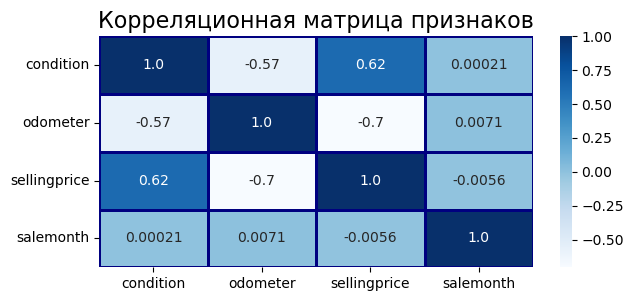

In [58]:
plt.figure(figsize=(7, 3))

sns.heatmap(df_train.drop(['year'], axis=1).corr(
    method='spearman'), annot = True, fmt='.2', cmap= 'Blues', linewidths=1, linecolor='#000080')

plt.title('Корреляционная матрица признаков', fontsize=16)

plt.show()

- Существенная мультиколлинеарность признаков не обнаружена.<br>
- Имеется зависимость между полями 'condition', 'sellingprice', состояние автомобиля напрямую влияет на его итоговую стоимость.

**c)** Анализ дубликатов, уникальности значений для полей, содержащих категориальные значения.

- Поле **'year'**.

In [59]:
print(sorted(df_train['year'].unique().tolist()))

[1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [60]:
display(df_train['year'].value_counts().to_frame())

,year
2012,80625
2013,77566
2014,64225
2011,38115
2008,24646
2007,24152
2006,21118
2010,20647
2005,16794
2009,16064


In [61]:
display(df_test['year'].value_counts().to_frame())

,year
2012,20245
2013,19431
2014,16079
2011,9530
2008,6104
2007,5985
2006,5238
2010,5219
2005,4242
2009,4036


*Данные корректны. Пропуски отсутствуют.*

- Поле **'make'**.

In [62]:
print(df_train['make'].sort_values().unique().tolist())

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'ford truck', 'geo', 'gmc', 'gmc truck', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw', nan]


In [63]:
df_train['make'] = df_train['make'].fillna('nodata')

In [64]:
df_train['make'] = df_train['make'].replace('dodge tk', 'dodge')

In [65]:
df_train['make'] = df_train['make'].replace('ford truck', 'ford')

In [66]:
df_train['make'] = df_train['make'].replace('gmc truck', 'gmc')

In [67]:
df_train['make'] = df_train['make'].replace('landrover', 'land rover')

In [68]:
df_train['make'] = df_train['make'].replace('mazda tk', 'mazda')

In [69]:
df_train['make'] = df_train['make'].replace('mercedes-b', 'mercedes')

In [70]:
df_train['make'] = df_train['make'].replace('mercedes-benz', 'mercedes')

In [71]:
df_train['make'] = df_train['make'].replace('vw', 'volkswagen')

In [72]:
print(df_train['make'].sort_values().unique().tolist())

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi', 'nissan', 'nodata', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo']


In [73]:
display(df_train['make'].value_counts().to_frame())

,make
ford,74070
chevrolet,47818
nissan,42866
toyota,31711
dodge,24295
honda,21600
hyundai,17187
bmw,16254
kia,14325
chrysler,13796


In [74]:
print(df_test['make'].sort_values().unique().tolist())

['acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'ferrari', 'fiat', 'fisker', 'ford', 'ford tk', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'hyundai tk', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw', nan]


In [75]:
df_test['make'] = df_test['make'].fillna('nodata')

In [76]:
df_test['make'] = df_test['make'].replace('chev truck', 'chevrolet')

In [77]:
df_test['make'] = df_test['make'].replace('ford tk', 'ford')

In [78]:
df_test['make'] = df_test['make'].replace('hyundai tk', 'hyundai')

In [79]:
df_test['make'] = df_test['make'].replace('landrover', 'land rover')

In [80]:
df_test['make'] = df_test['make'].replace('mercedes-benz', 'mercedes')

In [81]:
df_test['make'] = df_test['make'].replace('vw', 'volkswagen')

In [82]:
print(df_test['make'].sort_values().unique().tolist())

['acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi', 'nissan', 'nodata', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo']


In [83]:
display(df_test['make'].value_counts().to_frame())

,make
ford,18467
chevrolet,11802
nissan,10485
toyota,7728
dodge,6188
honda,5382
hyundai,4410
bmw,4136
kia,3571
mercedes,3471


*В данных произведена замена ряда значений. Пустые значения заменены на значение 'nodata'.*

- Поле **'model'**.

In [84]:
print(df_train['model'].sort_values().unique().tolist())

['1 series', '1500', '190-class', '2 series', '200', '200sx', '2500', '3', '3 series', '3 series gran turismo', '300', '300-class', '3000gt', '300e', '300m', '300zx', '320i', '323i', '328i', '3500', '350z', '370z', '4 series', '4 series gran coupe', '400-class', '420-class', '420sel', '42c', '458 italia', '4runner', '5 series', '5 series gran turismo', '500', '500-class', '500e', '500l', '6', '6 series', '6 series gran coupe', '626', '7', '7 series', '750i', '750li', '750lxi', '8 series', '850', '9-2x', '9-3', '9-5', '9-7x', '911', '940', '960', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'acadia', 'accent', 'accord', 'accord crosstour', 'accord hybrid', 'activehybrid 5', 'activehybrid 7', 'activehybrid x6', 'aerio', 'alero', 'allroad', 'allroad quattro', 'alp', 'altima', 'altima hybrid', 'amanti', 'amigo', 'armada', 'ascender', 'aspen', 'aspire', 'astra', 'astro', 'astro cargo', 'ats', 'aura', 'aura hybrid', 'aurora', 'avalanche', 'avalon', 'avalon hybrid', 'avenger', 'aveo', 'aviator', 'axio

In [85]:
df_train['model'] = df_train['model'].fillna('nodata')

In [86]:
df_train['model'] = df_train['model'].replace(to_replace ='-', value = '', regex = True)

In [87]:
df_train['model'] = df_train['model'].replace(to_replace =' series', value = '', regex = True)

In [88]:
df_train['model'] = df_train['model'].replace(to_replace ='uplandr', value = 'uplander', regex = True)

In [89]:
df_train['model'] = df_train['model'].replace(to_replace ='twn&country', value = 'town&country', regex = True)

In [90]:
df_train['model'] = df_train['model'].replace(to_replace ='twn/cntry', value = 'town&country', regex = True)

In [91]:
display(df_train['model'].value_counts().to_frame())

,model
altima,15454
f150,11459
fusion,10244
camry,10000
escape,9447
...,...
328i,1
activehybrid 5,1
f350,1
c230,1


In [92]:
df_test['model'] = df_test['model'].fillna('nodata')

In [93]:
df_test['model'] = df_test['model'].replace(to_replace ='-', value = '', regex = True)

In [94]:
df_test['model'] = df_test['model'].replace(to_replace =' series', value = '', regex = True)

In [95]:
df_test['model'] = df_test['model'].replace(to_replace ='uplandr', value = 'uplander', regex = True)

In [96]:
df_test['model'] = df_test['model'].replace(to_replace ='twn&country', value = 'town&country', regex = True)

In [97]:
df_test['model'] = df_test['model'].replace(to_replace ='twn/cntry', value = 'town&country', regex = True)

In [98]:
display(df_test['model'].value_counts().to_frame())

,model
altima,3736
f150,2748
fusion,2553
camry,2423
escape,2296
...,...
exige,1
achieva,1
c240w,1
accord hybrid,1


*В данных произведена замена. Пустые значения заменены на значение 'nodata'.*

- Поле **'trim'**.

In [99]:
print(df_train['trim'].sort_values().unique().tolist())

['!', '& coun fwd', '& coun fwd limited', '& coun fwd lx', '& country lx', '(1999.5) xe', '+', '1', '1.6', '1.6 base', '1.6 s', '1.6 s plus', '1.6 sl', '1.6 sv', '1.8', '1.8 base', '1.8 krom', '1.8 s', '1.8 s krom edition', '1.8 sl', '1.8 tfsi premium', '1.8 tfsi premium plus', '1.8t', '1.8t avant quattro', '1.8t classic', '1.8t quattro', '1.9', '10th anniversary', '128i', '128i sulev', '135i', '135is', '150 low roof', '1500', '1500 4x2', '1500 4x2 cr sle', '1500 4x2 cr sle1', '1500 4x2 ex sle', '1500 4x2 slt', '1500 4x4 cr slt', '1500 4x4 ex sle', '1500 4x4 v8 slt', '1500 awd cr denali', '1500 base', '1500 high roof', '1500 low roof', '1500 lramie slt', '1500 ls', '1500 lt', '1500 lt1', '1500 ltz', '1500 maxi', '1500 s', '1500 sle', '1500 slt', '1500 sv', '1794', '1794 ffv', '180hp', '180hp quattro', '190e 2.3', '1ls fleet', '1lt', '1lt fleet', '1ss', '2', '2+2', '2.0', '2.0 s', '2.0 sl', '2.0 sr', '2.0 tdi premium', '2.0 tdi premium plus', '2.0 tfsi premium plus quattro', '2.0 tfsi p

In [100]:
df_train['trim'] = df_train['trim'].fillna('nodata')

In [101]:
df_train['trim'] = df_train['trim'].replace(to_replace ='-', value = '', regex = True)

In [102]:
sort_trim = df_train['trim'].value_counts(normalize=True)

df_train.loc[df_train['trim'].isin(sort_trim[sort_trim < 0.00001].index), 'trim'] = 'other'

In [103]:
display(df_train['trim'].value_counts().to_frame())

,trim
base,43876
se,34498
lx,16511
limited,14526
lt,13431
...,...
el 4x4 limited,5
2.5i sport,5
g55 amg,5
fwd base,5


In [104]:
df_test['trim'] = df_test['trim'].fillna('nodata')

In [105]:
df_test['trim'] = df_test['trim'].replace(to_replace ='-', value = '', regex = True)

In [106]:
sort_trim = df_test['trim'].value_counts(normalize=True)

df_test.loc[df_test['trim'].isin(sort_trim[sort_trim < 0.00001].index), 'trim'] = 'other'

In [107]:
display(df_test['trim'].value_counts().to_frame())

,trim
base,11009
se,8725
lx,4098
limited,3537
lt,3280
...,...
2.0t sportcombi,2
vr6 4motion,2
v6 luxury,2
warner brothers,2


*В данных произведена замена. Пустые значения заменены на значение 'nodata'. Модификации, встречающиеся в совокупности реже 0.001%, объединены в отдельную категорию - 'other'.*

- Поле **'body'**.

In [108]:
print(df_train['body'].sort_values().unique().tolist())

['access cab', 'beetle convertible', 'cab plus', 'cab plus 4', 'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon', 'double cab', 'e-series van', 'elantra coupe', 'extended cab', 'g convertible', 'g coupe', 'g sedan', 'g37 convertible', 'g37 coupe', 'genesis coupe', 'granturismo convertible', 'hatchback', 'king cab', 'koup', 'mega cab', 'minivan', 'promaster cargo van', 'q60 convertible', 'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'regular-cab', 'sedan', 'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon', 'van', 'wagon', 'xtracab', nan]


In [109]:
df_train['body'] = df_train['body'].fillna('nodata')

In [110]:
df_train['body'] = df_train['body'].replace(to_replace ='-', value = ' ', regex = True)

In [111]:
display(df_train['body'].value_counts().to_frame())

,body
sedan,190861
suv,113042
hatchback,20715
minivan,20114
coupe,13896
crew cab,12823
wagon,12600
nodata,10393
convertible,8183
supercrew,7081


In [112]:
df_test['body'] = df_test['body'].fillna('nodata')

In [113]:
df_test['body'] = df_test['body'].replace(to_replace ='-', value = ' ', regex = True)

In [114]:
display(df_test['body'].value_counts().to_frame())

,body
sedan,47484
suv,28296
hatchback,5152
minivan,5091
coupe,3503
wagon,3276
crew cab,3152
nodata,2594
convertible,2059
supercrew,1731


*В данных произведена замена. Пустые значения заменены на значение 'nodata'.*

- Поле **'transmission'**.

In [115]:
print(df_train['transmission'].sort_values().unique().tolist())

['automatic', 'manual', nan]


In [116]:
df_train['transmission'] = df_train['transmission'].fillna('nodata')

In [117]:
display(df_train['transmission'].value_counts().to_frame())

,transmission
automatic,375061
nodata,51461
manual,13714


In [118]:
df_test['transmission'] = df_test['transmission'].fillna('nodata')

In [119]:
display(df_test['transmission'].value_counts().to_frame())

,transmission
automatic,93585
nodata,13012
manual,3463


*В данных произведена замена. Пустые значения заменены на значение 'nodata'.*

- Поле **'state'**.

In [120]:
print(df_train['state'].sort_values().unique().tolist())

['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns', 'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn', 'tx', 'ut', 'va', 'wa', 'wi']


In [121]:
display(df_train['state'].value_counts().to_frame())

,state
fl,65618
ca,57407
pa,42462
tx,36104
ga,27141
nj,22102
il,18651
nc,17051
oh,16959
tn,16156


In [122]:
display(df_test['state'].value_counts().to_frame())

,state
fl,16295
ca,14204
pa,10744
tx,8945
ga,6862
nj,5522
il,4656
oh,4230
nc,4201
tn,4075


*Данные корректны.*

- Поле **'color'**.

In [123]:
print(df_train['color'].sort_values().unique().tolist())

['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold', 'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow', '—', nan]


In [124]:
df_train['color'] = df_train['color'].fillna('nodata')

In [125]:
df_train['color'] = df_train['color'].replace(to_replace ='—', value = 'nodata', regex = True)

In [126]:
display(df_train['color'].value_counts().to_frame())

,color
black,87115
white,84149
silver,65667
gray,65284
blue,40237
red,34514
nodata,20106
green,8975
gold,8934
beige,7257


In [127]:
df_test['color'] = df_test['color'].fillna('nodata')

In [128]:
df_test['color'] = df_test['color'].replace(to_replace ='—', value = 'nodata', regex = True)

In [129]:
display(df_test['color'].value_counts().to_frame())

,color
black,22006
white,20929
silver,16360
gray,16348
blue,10180
red,8385
nodata,5106
green,2270
gold,2207
beige,1826


*В данных произведена замена. Пустые значения заменены на значение 'nodata'.*

- Поле **'interior'**.

In [130]:
print(df_train['interior'].sort_values().unique().tolist())

['beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray', 'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan', 'white', 'yellow', '—', nan]


In [131]:
df_train['interior'] = df_train['interior'].fillna('nodata')

In [132]:
df_train['interior'] = df_train['interior'].replace(to_replace ='—', value = 'nodata', regex = True)

In [133]:
display(df_train['interior'].value_counts().to_frame())

,interior
black,192442
gray,140843
beige,46878
tan,34709
nodata,14149
brown,6818
red,1070
blue,885
silver,844
off-white,373


In [134]:
df_test['interior'] = df_test['interior'].fillna('nodata')

In [135]:
df_test['interior'] = df_test['interior'].replace(to_replace ='—', value = 'nodata', regex = True)

In [136]:
display(df_test['interior'].value_counts().to_frame())

,interior
black,48176
gray,34986
beige,11931
tan,8658
nodata,3538
brown,1664
red,264
blue,241
silver,225
off-white,107


*В данных произведена замена. Пустые значения заменены на значение 'nodata'.*

- Поле **'salemonth'**.

In [137]:
print(sorted(df_train['salemonth'].unique().tolist()))

[1, 2, 3, 4, 5, 6, 7, 12]


In [138]:
display(df_train['salemonth'].value_counts().to_frame())

,salemonth
2,127375
1,111510
6,78519
12,42753
5,42108
3,35845
4,1138
7,988


In [139]:
display(df_test['salemonth'].value_counts().to_frame())

,salemonth
2,31966
1,27805
6,19459
12,10661
5,10495
3,9132
4,289
7,253


*Данные корректны. Стоит отметить, что не наблюдается продаж за осенние месяцы.*

> **Вывод к шагу 1.4 "Изучение категориальных значений"**

- В полях 'year', 'salemonth' данные корректны. Значения поля 'salemonth' показали, что в датасетах отсутствуют продажи автомобилей за несколько месяцев (8-11).
- Значения в полях типа object очищены от лишних символов.
- В отдельные признаки внесены изменения, **пустые значения** заменены на значение **'nodata'**.
- Поле **'trim'** - модификации, встречающиеся в совокупности реже 0.001%, объединены в отдельную категорию - other.

## Проверка количественных значений
<a id='количественные_значения_задание'></a>
[К содержанию](#количественные_значения)

**a)** Анализ статистических показателей для полей с количественными значениями.

In [140]:
df_train.drop(categorical_values, axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
condition,"430,831.00",3.43,0.95,1.00,2.70,3.60,4.20,5.00
odometer,"440,236.00","68,333.71","53,544.84",0.00,"28,249.00","52,089.00","99,266.00","999,999.00"
sellingprice,"440,236.00","13,592.21","9,751.48",1.00,"6,900.00","12,100.00","18,200.00","230,000.00"


- В столбце с минимальными значениями отсутствуют отрицательные числа - корректно, анализируемые **данные не должны иметь отрицательных значений**.
- Для поля **'sellingprice'** минимальное значение равно 1 усл. ед., среднее - 13592 усл. ед., что вызывает вопросы о корректности данных.
- Для большинства полей медианное значение близко к среднему, данные немного смещены.
- Поле **'odometer'**: медианное значение (52089) меньше среднего (68333), следовательно, данные смещены влево; имеются автомобили как с нулевым, так с очень большим пробегом (999999), большая часть автомобилей имеет пробег ниже среднего.

In [141]:
df_test.drop(categorical_values, axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
condition,"107,681.00",3.42,0.95,1.00,2.70,3.60,4.20,5.00
odometer,"110,060.00","68,063.94","53,526.40",0.00,"28,302.50","51,904.50","98,847.25","999,999.00"
sellingprice,"110,060.00","12,897.74","7,346.19",855.91,"7,581.75","12,451.23","16,881.65","71,991.31"


Выводы для датасета 'df_test' аналогичны выводам для датасета 'df_train'.

- Поле **'condition'**.

Как показал анализ выше, в поле 'condition' имеются значения типа NaN. Заменим значение NaN на 0, при этом будем помнить, что **"0 - отсутствие данных о состоянии автомобиля"**.

In [142]:
df_train['condition'] = df_train['condition'].fillna(0)

In [143]:
display(df_train['condition'].value_counts().to_frame())

,condition
1.90,33207
3.50,21016
3.70,20399
4.40,20027
4.30,19712
4.20,19345
3.60,18209
4.10,18108
2.00,16431
4.00,15797


In [144]:
df_test['condition'] = df_test['condition'].fillna(0)

In [145]:
display(df_test['condition'].value_counts().to_frame())

,condition
1.90,8429
3.50,5233
4.40,5096
3.70,5066
4.30,4832
4.20,4631
3.60,4574
4.10,4553
2.00,4117
3.90,3995


*Данные корректны.*

- Поле **'odometer'**.

In [146]:
display(df_train['odometer'].value_counts().to_frame())

,odometer
1,1059
0,69
999999,55
10,23
21587,17
...,...
170370,1
128689,1
1709,1
247960,1


In [147]:
df_train.loc[df_train['odometer'] < 10]['odometer'].count()

1205

In [148]:
display(df_test['odometer'].value_counts().to_frame())

,odometer
1,246
0,19
999999,17
14452,8
48473,8
...,...
1729,1
46226,1
37683,1
138097,1


*В датасете df_train 0,3% автомобилей имеют пробег менее 10 миль.*

- Поле **'sellingprice'**.

In [149]:
display(df_train['sellingprice'].value_counts().to_frame())

,sellingprice
11000,3510
12000,3499
13000,3374
10000,3178
14000,3104
...,...
57100,1
73100,1
41501,1
66700,1


In [150]:
df_train.loc[(df_train['sellingprice'] <= 100)]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,salemonth
18762,2002,ford,taurus,ses,sedan,nodata,pa,1.90,132230,silver,gray,100,6
51885,1993,nodata,nodata,nodata,nodata,automatic,hi,1.00,39750,white,gray,100,1
51979,2002,dodge,durango,slt,suv,automatic,pr,1.90,145161,silver,gray,100,5
90212,2006,ford,freestar,se,minivan,automatic,hi,1.80,75389,silver,gray,100,3
101830,2009,nodata,nodata,nodata,nodata,automatic,fl,2.00,1,white,gray,100,2
137962,2003,mercedes,eclass,e500,sedan,automatic,ga,2.10,1,black,black,1,1
189460,2002,chrysler,sebring,gtc,convertible,automatic,ut,1.00,94937,black,tan,100,1
227267,2003,chevrolet,impala,base,sedan,automatic,pa,1.90,215987,gray,tan,100,5
262011,2008,chrysler,pt cruiser,touring,wagon,automatic,hi,2.50,90335,white,gray,100,2
292850,2003,nissan,altima,2.5 sl,sedan,automatic,hi,1.40,101792,white,gray,100,2


In [151]:
display(df_test['sellingprice'].value_counts().to_frame())

,sellingprice
"13,056.10",2359
"13,804.78",1709
"14,726.04",1314
"13,265.21",1117
"13,048.84",912
...,...
"14,258.70",1
"10,425.48",1
"6,973.81",1
"16,425.55",1


*В датасетах имеются автомобили со стоимостью продажи ниже 100 усл. ед. У большей части таких транспортных средств в поле 'condition' указано значение близкое или равное 1, возможна продажа на детали. Тем не менее необходимы уточнения по данным.*

**b)** Анализ возможных выбросов в выборке. Построение графиков распределений значений признаков.

> **Датасет df_train**

In [152]:
def plots(df, data, data_label, n_bins):
    
    a, axes = plt.subplots(1, 2, figsize=(16,4))
    
    axes[0].set_title('частота распределения', fontsize=14)
    axes[0].set_ylabel('частота', fontsize=14)
    axes[0].set_xlabel(data_label, fontsize=14)
    
    data.hist(bins=n_bins, ax=axes[0], edgecolor='black', linewidth=1)
            
    axes[1].set_title('boxplot', fontsize=14)
    axes[1].set_xlabel(data_label, fontsize=14)
    
    sns.boxplot(data=df, x=data_label, ax=axes[1], linewidth=1)
    
    plt.grid(True, alpha=0.3)
    
    plt.show() 

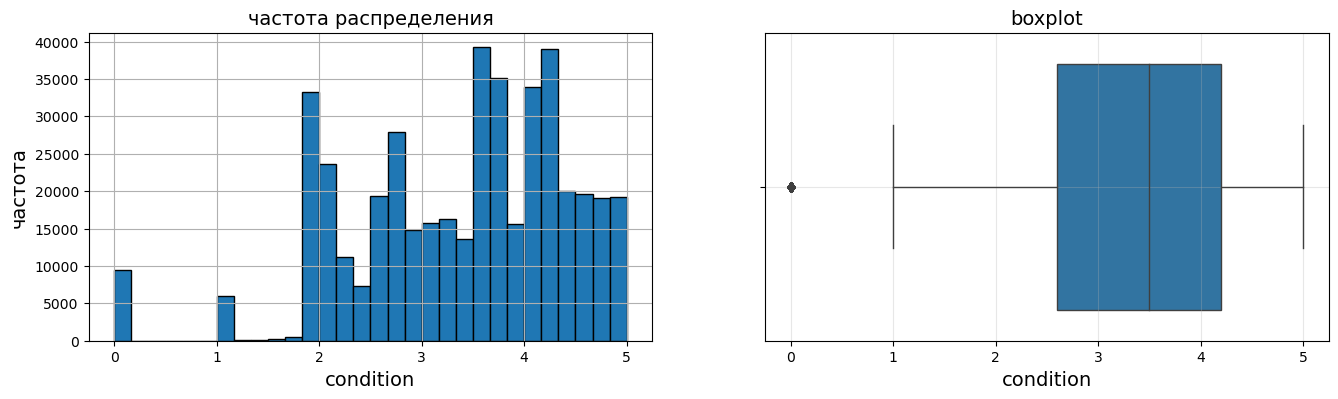

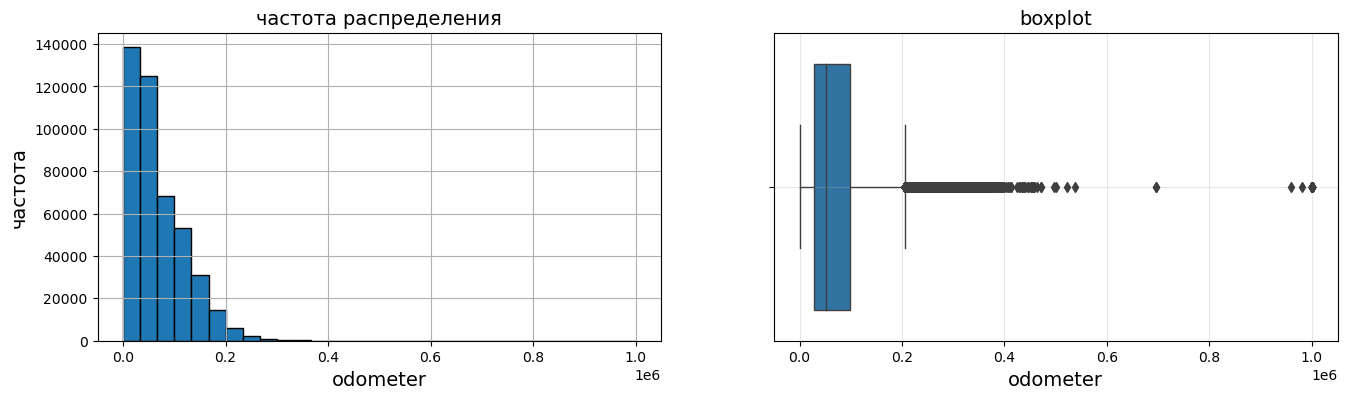

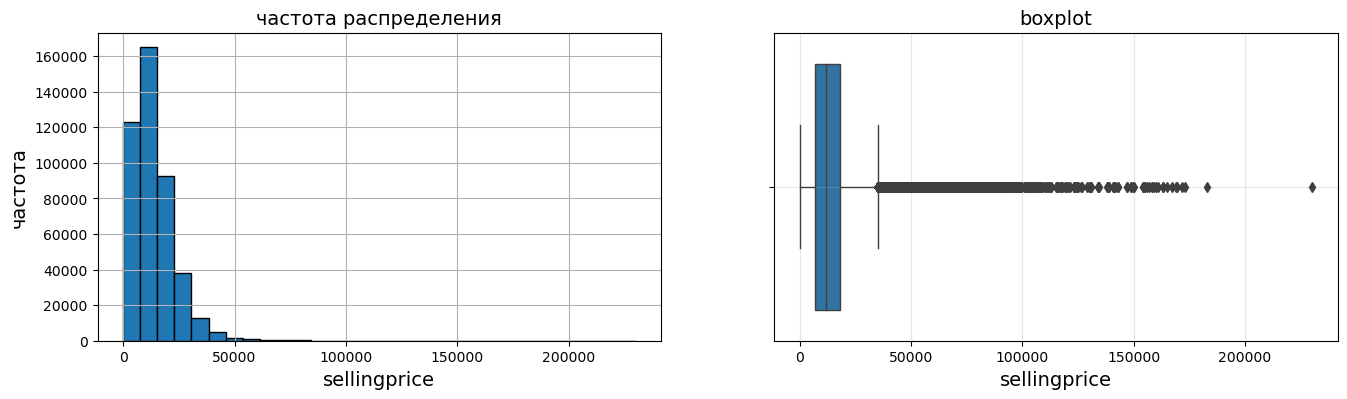

In [153]:
for column in df_train.drop(categorical_values, axis=1).columns:
    
    plots(df_train, df_train[column], column, n_bins=30)

Для двух полей наблюдаются выбросы.

**c)** Расчет доли выбросов от общего количества данных.

In [154]:
def outliers_test_right(df, column):
    
    x_max = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    x_max_rate = len(df.loc[df[column] > x_max]) / df.shape[0] * 100
    
    print('Доля выбросов в параметре {}: {:,.2f} %'.format(column, x_max_rate))

In [155]:
def outliers_test_left(df, column):
    
    x_max = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    x_max_rate = len(df.loc[df[column] < x_max]) / df.shape[0] * 100
    
    print('Доля выбросов в параметре {}: {:,.2f} %'.format(column, x_max_rate))

In [156]:
outliers_test_right(df_train, 'odometer')

Доля выбросов в параметре odometer: 1.85 %


In [157]:
outliers_test_right(df_train, 'sellingprice')

Доля выбросов в параметре sellingprice: 2.92 %


- Данные выбросы выглядят вполне реалистично, их можно отнести к контекстным выбросам.
- Исходя из особенностей выборки **данные оставим без изменений (выбросы не будут удалены)**.

> **Датасет df_test**

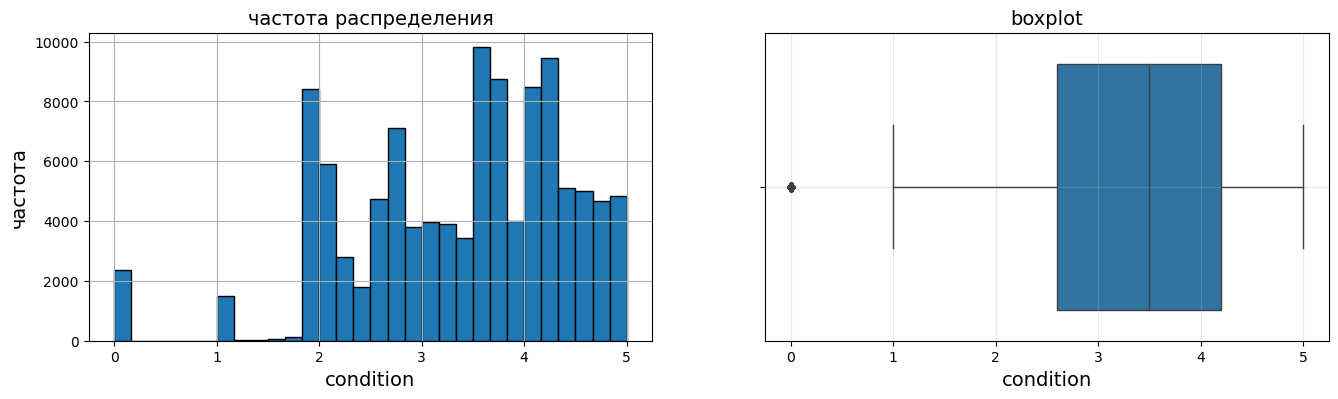

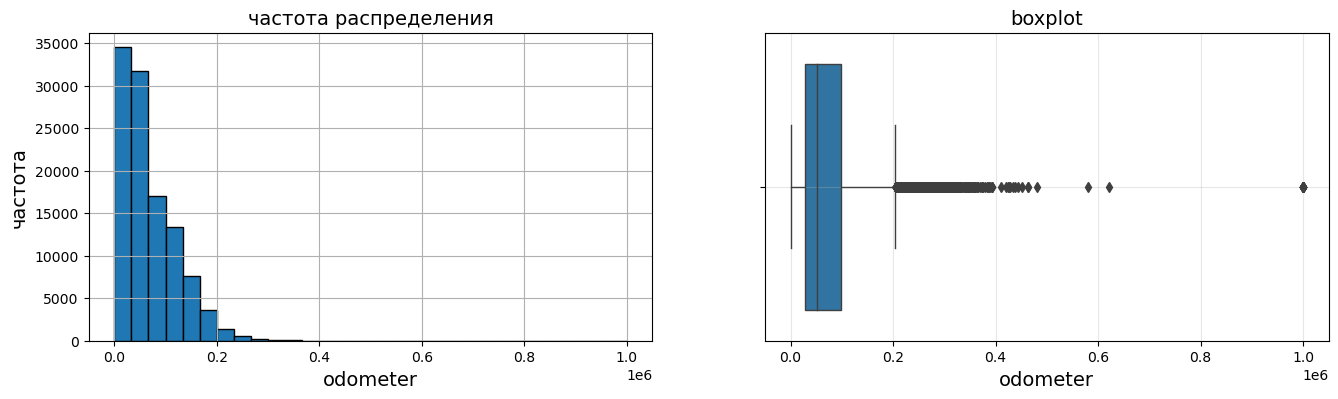

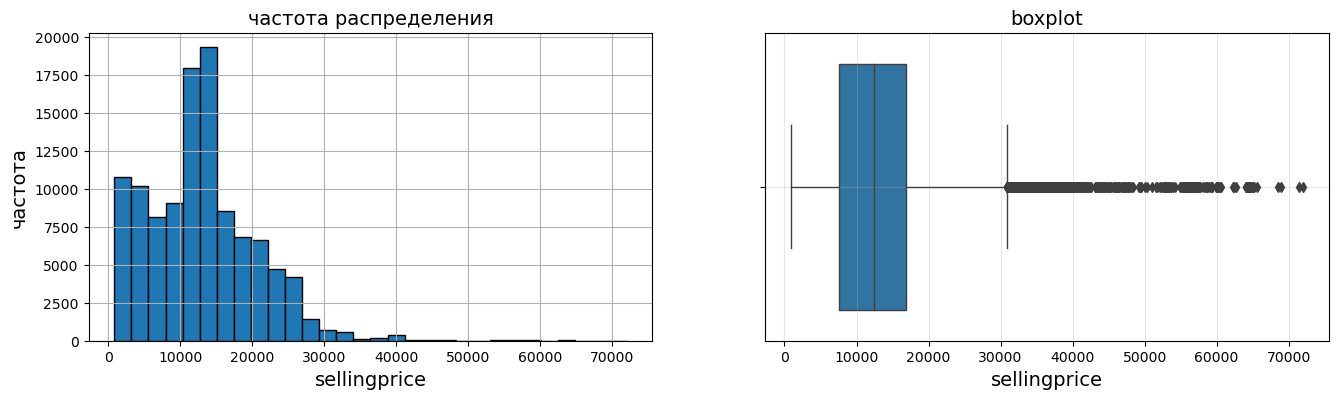

In [158]:
for column in df_test.drop(categorical_values, axis=1).columns:
    
    plots(df_test, df_test[column], column, n_bins=30)

Для двух полей наблюдаются выбросы.

In [159]:
outliers_test_right(df_test, 'odometer')

Доля выбросов в параметре odometer: 1.85 %


In [160]:
outliers_test_right(df_test, 'sellingprice')

Доля выбросов в параметре sellingprice: 1.44 %


- Данные выбросы выглядят вполне реалистично, их можно отнести к контекстным выбросам.
- Исходя из особенностей выборки **данные оставим без изменений (выбросы не будут удалены)**.

> **Вывод к шагу 1.5 "Проверка количественных значений"**

- В поле **'condition'** данные корректны. Пропуски заменены на значение 0 - отсутствие данных.
- Поле **'odometer'**: медианное значение (52089) меньше среднего (68333), следовательно, данные смещены влево; имеются автомобили как с нулевым, так с очень большим пробегом (999999), большая часть автомобилей имеет пробег ниже среднего. В датасете df_train 0,3% автомобилей имеют пробег менее 10 миль.
- Для поля **'sellingprice'** минимальное значение равно 1 усл. ед., среднее - 13592 усл. ед. В датасетах имеются автомобили со стоимостью продажи ниже 100 усл. ед. У большей части таких транспортных средств в поле 'condition' указано значение близкое или равное 1, возможна продажа на детали. Тем не менее необходимы уточнения по данным.
- Ряд полей в датасетах содержит выбросы. Данные выбросы выглядят вполне реалистично, их можно отнести к контекстным выбросам (не удалены).

# 2. Разработка модели ML

**2.1.** One-hot кодирование категориальные признаков.<br>
<a id='ohe_данных_задание'></a>
[К содержанию](#ohe_данных)

**a)** Выведем размерность исходных датафреймов, чтобы по итогу убедиться в правильности соединения датафрейма с перекодированными полями с исходным датафреймом (без потери данных).

In [161]:
print('Количество записей, полей в обучающем наборе df_train:', df_train.shape)

Количество записей, полей в обучающем наборе df_train: (440236, 13)


In [162]:
print('Количество записей, полей в тестовом наборе df_test:', df_test.shape)

Количество записей, полей в тестовом наборе df_test: (110060, 13)


**b)** Выполним кодирование категориальных признаков методом OneHotEncoder.

In [163]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int8)

feature_array = ohe.fit_transform(df_train[df_train.select_dtypes(include = ['object']).columns])
feature_labels = ohe.get_feature_names_out(df_train.select_dtypes(include = ['object']).columns)

df_train_ohe = pd.DataFrame(feature_array, columns = feature_labels)

In [164]:
feature_array = ohe.transform(df_test[df_test.select_dtypes(include = ['object']).columns])

df_test_ohe = pd.DataFrame(feature_array, columns = feature_labels)

In [165]:
print('Количество записей, полей в выборке df_train_ohe:', df_train_ohe.shape)

Количество записей, полей в выборке df_train_ohe: (440236, 2243)


In [166]:
print('Количество записей, полей в выборке df_test_ohe:', df_test_ohe.shape)

Количество записей, полей в выборке df_test_ohe: (110060, 2243)


**c)** Из исходных датафреймов создадим вспомогательные датафреймы без полей с категориальными признаками, чтобы избежать dummy-ловушки.

In [167]:
train_temp = df_train[df_train.select_dtypes(include = ['int','float']).columns]

In [168]:
test_temp = df_test[df_test.select_dtypes(include = ['int','float']).columns]

In [169]:
print('Количество записей, полей в выборке train_temp:', train_temp.shape)
print('Количество записей, полей в выборке test_temp:', test_temp.shape)

Количество записей, полей в выборке train_temp: (440236, 5)
Количество записей, полей в выборке test_temp: (110060, 5)


**d)** Соединим по индексам датафреймы с перекодированными категориальными признаками со вспомогательными датафреймами без категориальных признаков.

In [170]:
df_train_ohe = pd.merge(train_temp, df_train_ohe, left_index=True, right_index=True)

In [171]:
df_test_ohe = pd.merge(test_temp, df_test_ohe, left_index=True, right_index=True)

In [172]:
print('Количество записей, полей в обучающем наборе df_train_ohe:', df_train_ohe.shape)
print('Количество записей, полей в тестовом наборе df_test_ohe:', df_test_ohe.shape)

Количество записей, полей в обучающем наборе df_train_ohe: (440236, 2248)
Количество записей, полей в тестовом наборе df_test_ohe: (110060, 2248)


In [173]:
df_train_ohe.head()

year  condition  odometer  sellingprice  salemonth  make_acura  \
0  2011       4.20    111041         12500          6           0   
1  2014       3.50     31034         14500          2           0   
2  2012       2.20     35619          9100          6           0   
3  2003       2.80    131301         13300          6           0   
4  2007       2.00    127709          1300          2           0   

   make_airstream  make_aston martin  make_audi  make_bentley  make_bmw  \
0               0                  0          0             0         0   
1               0                  0          0             0         0   
2               0                  0          0             0         0   
3               0                  0          0             0         0   
4               0                  0          0             0         0   

   make_buick  make_cadillac  make_chevrolet  make_chrysler  make_daewoo  \
0           0              0               0              0            0   
1           0              0               0              0            0   
2           0              0               0              0            0   
3           0              0               0              0            0   
4           0              0               0              0            0   

   make_dodge  make_dot  make_ferrari  make_fiat  make_fisker  make_ford  \
0           0         0             0          0            0          1   
1           0         0             0          0            0          1   
2           0         0             0          0            0          0   
3           0         0             0          0            0          0   
4           0         0             0          0            0          1   

   make_geo  make_gmc  make_honda  make_hummer  make_hyundai  make_infiniti  \
0         0         0           0            0             0              0   
1         0         0           0            0             0              0   
2         0         0           0            0             0              0   
3         0         0           0            1             0              0   
4         0         0           0            0             0              0   

   make_isuzu  make_jaguar  make_jeep  make_kia  make_lamborghini  \
0           0            0          0         0                 0   
1           0            0          0         0                 0   
2           0            0          0         0                 0   
3           0            0          0         0                 0   
4           0            0          0         0                 0   

   make_land rover  make_lexus  make_lincoln  make_maserati  make_mazda  \
0                0           0             0              0           0   
1                0           0             0              0           0   
2                0           0             0              0           0   
3                0           0             0              0           0   
4                0           0             0              0           0   

   make_mercedes  make_mercury  make_mini  make_mitsubishi  make_nissan  \
0              0             0          0                0            0   
1              0             0          0                0            0   
2              0             0          0                0            1   
3              0             0          0                0            0   
4              0             0          0                0            0   

   make_nodata  make_oldsmobile  make_plymouth  make_pontiac  make_porsche  \
0            0                0              0             0             0   
1            0                0              0             0             0   
2            0                0              0             0             0   
3            0                0              0             0             0   
4            0                0          

In [174]:
df_test_ohe.head()

year  condition  odometer  sellingprice  salemonth  make_acura  \
0  2005       2.70    116970      4,359.65          1           0   
1  2014       4.40      6286     20,820.81          2           0   
2  2013       4.60     11831     19,730.90          2           0   
3  2013       2.30     57105     10,417.51          3           0   
4  2013       2.90     31083     26,142.94          6           0   

   make_airstream  make_aston martin  make_audi  make_bentley  make_bmw  \
0               0                  0          0             0         0   
1               0                  0          0             0         0   
2               0                  0          0             0         0   
3               0                  0          0             0         0   
4               0                  0          0             0         0   

   make_buick  make_cadillac  make_chevrolet  make_chrysler  make_daewoo  \
0           0              1               0              0            0   
1           0              0               0              0            0   
2           0              0               0              0            0   
3           0              0               1              0            0   
4           0              0               0              0            0   

   make_dodge  make_dot  make_ferrari  make_fiat  make_fisker  make_ford  \
0           0         0             0          0            0          0   
1           0         0             0          0            0          0   
2           0         0             0          0            0          0   
3           0         0             0          0            0          0   
4           0         0             0          0            0          0   

   make_geo  make_gmc  make_honda  make_hummer  make_hyundai  make_infiniti  \
0         0         0           0            0             0              0   
1         0         1           0            0             0              0   
2         0         0           0            0             0              0   
3         0         0           0            0             0              0   
4         0         0           0            0             0              0   

   make_isuzu  make_jaguar  make_jeep  make_kia  make_lamborghini  \
0           0            0          0         0                 0   
1           0            0          0         0                 0   
2           0            0          0         0                 0   
3           0            0          0         0                 0   
4           0            0          0         0                 0   

   make_land rover  make_lexus  make_lincoln  make_maserati  make_mazda  \
0                0           0             0              0           0   
1                0           0             0              0           0   
2                0           0             0              0           0   
3                0           0             0              0           0   
4                0           0             0              0           0   

   make_mercedes  make_mercury  make_mini  make_mitsubishi  make_nissan  \
0              0             0          0                0            0   
1              0             0          0                0            0   
2              0             0          0                0            1   
3              0             0          0                0            0   
4              0             0          0                0            1   

   make_nodata  make_oldsmobile  make_plymouth  make_pontiac  make_porsche  \
0            0                0              0             0             0   
1            0                0              0             0             0   
2            0                0              0             0             0   
3            0                0              0             0             0   
4            0                0          

**2.2.** Выделение признаков.<br>
<a id='выделение_признаков_задание'></a>
[К содержанию](#выделение_признаков)

В исходных данных выделим и сохраним в отдельные переменные признаки (**features**) и целевой признак (**target**):<br>
- признаки: *'year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'salemonth'*;<br>
- целевой признак: *'sellingprice'*.

In [175]:
features_train = df_train_ohe.drop(['sellingprice'], axis=1)
target_train = df_train_ohe['sellingprice']

In [176]:
features_test = df_test_ohe.drop(['sellingprice'], axis=1)
target_test = df_test_ohe['sellingprice']

In [177]:
print(f'Признаки обучающей выборки: {features_train.shape}')
print(f'Целевой признак обучающей выборки: {target_train.shape}')
print()

print(f'Признаки тестовой выборки: {features_test.shape}')
print(f'Целевой признак тестовой выборки: {target_test.shape}')

Признаки обучающей выборки: (440236, 2247)
Целевой признак обучающей выборки: (440236,)

Признаки тестовой выборки: (110060, 2247)
Целевой признак тестовой выборки: (110060,)


In [178]:
print('Размер обучающей выборки - {:.0%}'.format(target_train.shape[0] / (target_train.shape[0] + target_test.shape[0])))
print('Размер тестовой выборки - {:.0%}'.format(target_test.shape[0] / (target_train.shape[0] + target_test.shape[0])))

Размер обучающей выборки - 80%
Размер тестовой выборки - 20%


**2.3.** Масштабирование количественных признаков.<br>
<a id='масштабирование_задание'></a>
[К содержанию](#масштабирование)

In [179]:
quantitative_values = [
    'condition',
    'odometer'
]

In [180]:
scaler = StandardScaler()
scaler.fit(features_train[quantitative_values])

features_train[quantitative_values] = scaler.transform(features_train[quantitative_values])
features_test[quantitative_values] = scaler.transform(features_test[quantitative_values])

**2.4.** Построение моделей.<br>
<a id='построение_модели_задание'></a>
[К содержанию](#построение_модели)

Создание экземпляров классов LinearRegression, RandomForestRegressor, GradientBoostingRegressor. Проверка моделей на тестовой выборке. Расчет метрики MAPE.

*//Здесь должна быть создана сетка гиперпараметров для выбранных алгоритмов. Подбор гиперпараметров по сетке должен осуществляться через GridSearchCV. Но недостаточно времени для реализации и пересчета моделей.//*

**LinearRegression**

In [181]:
%%time

lr_model = LinearRegression()
lr_model.fit(features_train, target_train)
lr_model_pred = lr_model.predict(features_test)

CPU times: total: 9min 41s
Wall time: 8min 21s


In [182]:
lr_model_mape = mean_absolute_percentage_error(target_test, lr_model_pred)
print("Linear Regression MAPE:", lr_model_mape)

Linear Regression MAPE: 4254666.8584620105


**RandomForestRegressor**

In [183]:
%%time

rfr_model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rfr_model.fit(features_train, target_train)
rfr_model_pred = rfr_model.predict(features_test)

CPU times: total: 1h 44min 55s
Wall time: 1h 45min


In [184]:
rfr_model_mape = mean_absolute_percentage_error(target_test, rfr_model_pred)
print("Random Forest MAPE:", rfr_model_mape)

Random Forest MAPE: 0.29319272207496416


**GradientBoostingRegressor**

In [185]:
%%time

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=RANDOM_STATE)
gbr_model.fit(features_train, target_train)
gbr_model_pred = gbr_model.predict(features_test)

CPU times: total: 23min 31s
Wall time: 23min 32s


In [186]:
gbr_model_mape = mean_absolute_percentage_error(target_test, gbr_model_pred)
print("Gradient Boosting MAPE:", gbr_model_mape)

Gradient Boosting MAPE: 0.23997934717195896


> **Вывод к шагу 3 "Разработка модели ML"**

Модель с наименьшим значением MAPE будет считаться наиболее точной.<br>
Таким образом, на данном этапе можно полагать, что наиболее точная модель на основе **GradientBoostingRegressor** со значением **MAPE = 0.24**.<br>
В среднем модель ошибается на 24% в предсказании цен на автомобили.

# 3. Проверка модели

<a id='проверка_модели_задание'></a>
[К содержанию](#проверка_модели)

**a)** Расчет MSE (среднеквадратичной ошибки), RMSE (корня из среднеквадратичной ошибки) для трех моделей.

In [187]:
lr_mse = mean_squared_error(target_test, lr_model_pred)
lr_rmse = mean_squared_error(target_test, lr_model_pred, squared=False)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression RMSE:", lr_rmse)

Linear Regression MSE: 3.326171837275459e+24
Linear Regression RMSE: 1823779547334.4521


In [188]:
rfr_mse = mean_squared_error(target_test, rfr_model_pred)
rfr_rmse = mean_squared_error(target_test, rfr_model_pred, squared=False)

print("Random Forest MSE:", rfr_mse)
print("Random Forest RMSE:", rfr_rmse)

Random Forest MSE: 36093543.826840326
Random Forest RMSE: 6007.790261555436


In [189]:
gbr_mse = mean_squared_error(target_test, gbr_model_pred)
gbr_rmse = mean_squared_error(target_test, gbr_model_pred, squared=False)

print("Gradient Boosting MSE:", gbr_mse)
print("Gradient Boosting RMSE:", gbr_rmse)

Gradient Boosting MSE: 16182805.622471996
Gradient Boosting RMSE: 4022.785803702702


Чем меньше значение RMSE, тем более точной является модель.<br>
Аналогично выводам выше, наиболее точная модель на основе **GradientBoostingRegressor** со значением **RMSE = 4022.79**.

**b)** Сравнение качества предсказаний с константной моделью.<br>
<a id='константная_модель_задание'></a>
[К содержанию](#константная_модель)

In [193]:
mean_target_train = target_train.mean()

const_model = DummyRegressor(strategy='constant', constant=mean_target_train)
const_model.fit(features_train, target_train)

target_const_pred = const_model.predict(features_test)

const_mape = mean_absolute_percentage_error(target_test, target_const_pred)

print("GradientBoostingRegressor MAPE: {:.2f}%".format(gbr_model_mape * 100))
print("Constant Model MAPE: {:.2f}%".format(const_mape * 100))

GradientBoostingRegressor MAPE: 24.00%
Constant Model MAPE: 91.02%


**GradientBoostingRegressor** показывает лучшую производительность, чем константная модель. 

# 4. Значимые признаки выбранной модели
<a id='признаки_задание'></a>
[К содержанию](#признаки)

Выведем 15 значимых признаков выбранной модели.

In [196]:
feature_importances = gbr_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'feature': features_test.columns,
    'importance': feature_importances
})

top_15_features = feature_importances_df.sort_values(by='importance', ascending=False).head(15)

print(top_15_features)

              feature  importance
2            odometer        0.30
0                year        0.22
1           condition        0.10
2160       body_sedan        0.06
9            make_bmw        0.05
37      make_mercedes        0.03
2148   body_hatchback        0.03
46       make_porsche        0.02
2131    body_crew cab        0.02
33         make_lexus        0.01
32    make_land rover        0.01
2162   body_supercrew        0.01
8        make_bentley        0.01
2163         body_suv        0.01
7           make_audi        0.01


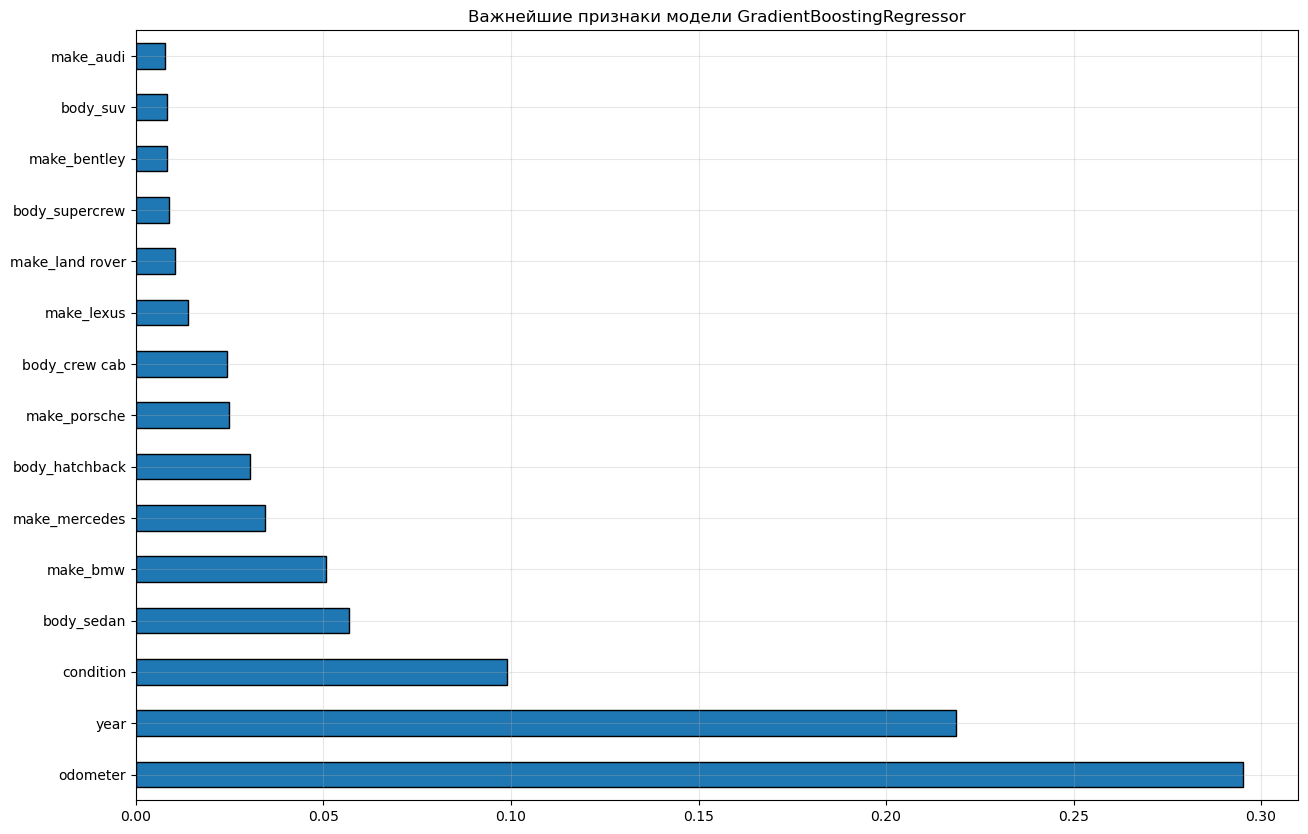

In [197]:
plt.figure(figsize=(15, 10))

pd.Series(feature_importances, features_test.columns).nlargest(15).plot(kind='barh', edgecolor='black', linewidth=1)
plt.title('Важнейшие признаки модели GradientBoostingRegressor')

plt.grid(True, alpha=0.3)

plt.show()

**Наиболее значимые признаки - пробег в милях, год выпуска, состояние транспортного средства**.

# 5. Общий вывод по проекту
<a id='общий_вывод_задание'></a>
[К содержанию](#общий_вывод)

**1. Предварительное изучение данных.**
- В датасетах train - **440236 записей, 15 полей**, test - **110060 записей, 15 полей**.
- В полях 'make', 'model', 'trim', 'body', 'transmission', 'condition', 'odometer', 'color', 'interior' **присутствуют пропущенные значения**.
- После анализа данных поля **'vin', 'seller', 'saledate' удалены** из обучающего и тестового датасетов.
- Для полей **'odometer', 'saledate'** изменены типы данных, из поля 'saledate' выделен месяц продажи автомобиля.
- Значения в полях типа object приведены к единому регистру, очищены от лишних пробелов и т.д.
- В отдельные признаки внесены изменения, **пустые значения** заменены на значение **'nodata'**, **'trim'** - модификации, встречающиеся в совокупности реже 0.001%, объединены в отдельную категорию - other.
- В поле **'condition'** пропуски заменены на значение 0 - отсутствие данных.
- Поле **'odometer'**: медианное значение (52089) меньше среднего (68333), следовательно, данные смещены влево; имеются автомобили как с нулевым, так с очень большим пробегом (999999), большая часть автомобилей имеет пробег ниже среднего. В датасете df_train 0,3% автомобилей имеют пробег менее 10 миль.
- Для поля **'sellingprice'** минимальное значение равно 1 усл. ед., среднее - 13592 усл. ед. В датасетах имеются автомобили со стоимостью продажи ниже 100 усл. ед. У большей части таких транспортных средств в поле 'condition' указано значение близкое или равное 1, возможна продажа на детали. Тем не менее необходимы уточнения по данным.
- Ряд полей в датасетах содержит выбросы. Данные выбросы выглядят вполне реалистично, их можно отнести к контекстным выбросам (не удалены).<br>

**2. Разработка модели ML.**
- При подготовке данных к моделированию выполнено **one-hot кодирование** категориальные признаков в выборке, **масштабирование** количественных признаков.
- В выборках выделены признаки (features) и целевой признак (target).
- Для моделирования выбраны три алгоритма решения задач регрессии: **'LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor'**.
- Для оптимизации модели выбрана **метрика MAPE**.
- По итогам обучения и тестирования алгоритмов были получены следующие результаты:
   - **'LinearRegression'**: MAPE-мера = 4254666.86;
   - **'RandomForestRegressor'**: MAPE-мера = 0.29;
   - **'GradientBoostingRegressor'**: MAPE-мера = 0.24.
- Итоговой моделью была выбрана модель **'GradientBoostingRegressor'** с гиперпараметрами: n_estimators=100, learning_rate=0.1, random_state=12345.<br>

**3. Проверка модели.**

- Проверка на адекватность итоговой модели с помощью константной модели **DummyRegressor** показала, что построенная модель **GradientBoostingRegressor** действительно лучшую производительность, чем константная модель.<br>
   
**4. Значимые признаки выбранной модели.**<br><br>
Наиболее значимые признаки модели:
- пробег в милях;
- год выпуска;
- состояние транспортного средства.